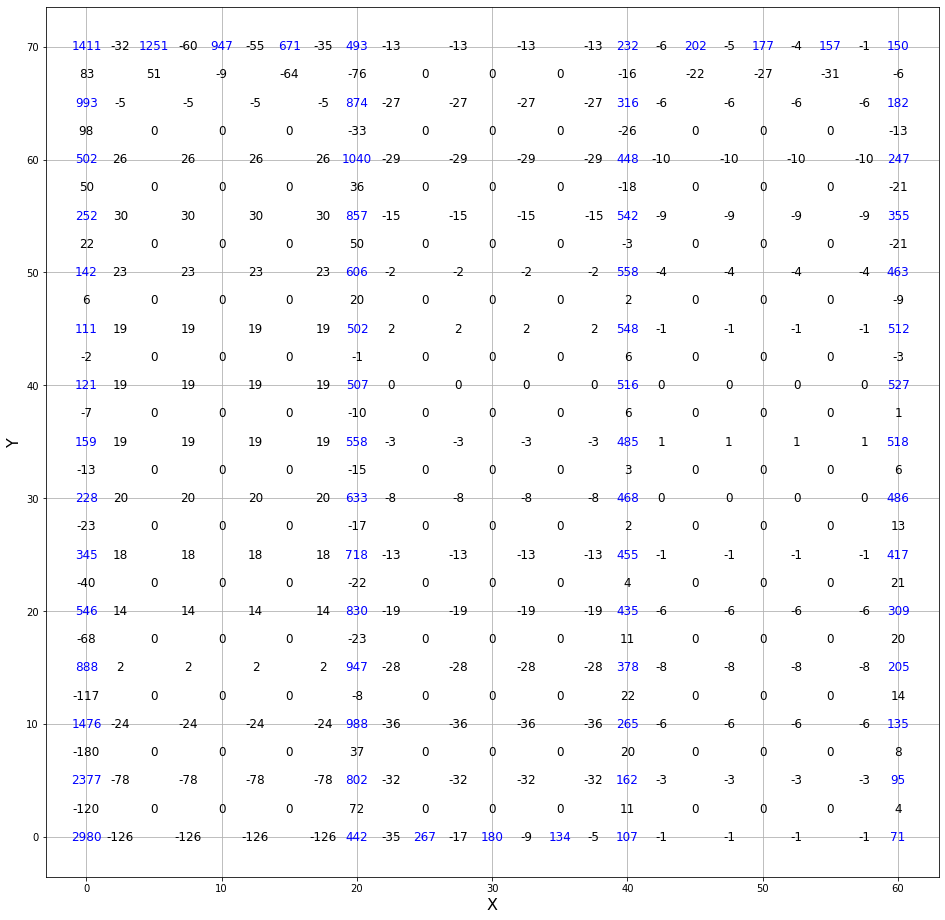

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = []
y = []
z = []

with open("example2_dec.csv") as f:
    reader = csv.reader(f)
    for row in [row for row in reader]:
        x.append(row[0])
        y.append(int(row[1]))
        z.append(int(row[2]))
x = [int(r) for r in x[1:]]
x.insert(0, 0)


margin = 5
width = max(x) // margin
height = max(y) // margin
img = np.zeros([height + 1, width + 1])
grad_x = np.zeros([height + 1, width])
grad_y = np.zeros([height, width + 1])

for i in range(len(z)):
    img[y[i] // margin][x[i] // margin] = int(z[i])
    
for h in range(height + 1):
    
    ret_x = 0
    for w in range(width):
        if img[h][w] > 0:
            ret_x = img[h][w]
            dis = margin
        else:
            dis += margin
            
        if ret_x > 0 and img[h][w + 1] > 0:
            this_grad_x = (img[h][w + 1] - ret_x) / dis
            while dis >= margin:
                grad_x[h][w - (dis // margin) + 1] = this_grad_x
                dis -= margin
                
for h in range(height):
    
    ret_y = 0
    for w in range(width + 1):
        if img[h][w] > 0:
            ret_y = img[h][w]
            dis = margin
        else:
            dis += margin
            
        if ret_y > 0 and img[h + 1][w] > 0:
            this_grad_y = (img[h + 1][w] - ret_y) / dis
            while dis >= margin:
                grad_y[h - (dis // margin) + 1][w] = this_grad_y
                dis -= margin


grad_x = grad_x.T
grad_y = grad_y.T
pdx = grad_x.reshape(-1)
pdy = grad_y.reshape(-1)
pdxx = np.where(grad_x)[0] * margin + (margin / 2)
pdxy = np.where(grad_x)[1] * margin
pdyx = np.where(grad_y > -10000)[0] * margin
pdyy = np.where(grad_y > -10000)[1] * margin + (margin / 2)



plt.figure(figsize=(16, 16))
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)
plt.grid()
plt.plot(x, y, linestyle='')
plt.plot(pdxx, pdxy, linestyle='', color='green')
plt.plot(pdyx, pdyy, linestyle='', color='green')

for i in range(len(z)):
    plt.text(x[i], y[i], str(z[i]), fontsize=12, color="blue", horizontalalignment='center', verticalalignment='center')


for i in range(pdx.size):
    plt.text(pdxx[i], pdxy[i], int(pdx[i]), fontsize=12, horizontalalignment='center', verticalalignment='center')

for i in range(pdy.size):
    plt.text(pdyx[i], pdyy[i], int(pdy[i]), fontsize=12, horizontalalignment='center', verticalalignment='center')

